In [1]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# general data processing
import pandas as pd

# text processing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML modeling
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv("./learn-ai-bbc/BBC News Train.csv")
df_test = pd.read_csv("./learn-ai-bbc/BBC News Test.csv")
df_sample_solution = pd.read_csv("./learn-ai-bbc/BBC News Sample Solution.csv")

In [3]:
df_train

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
df_train.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

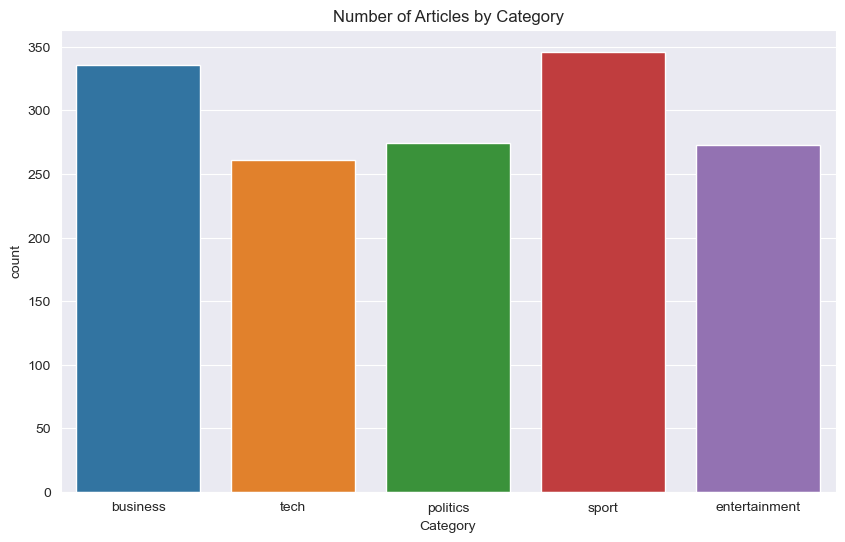

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x="Category")
plt.title("Number of Articles by Category")
plt.show()

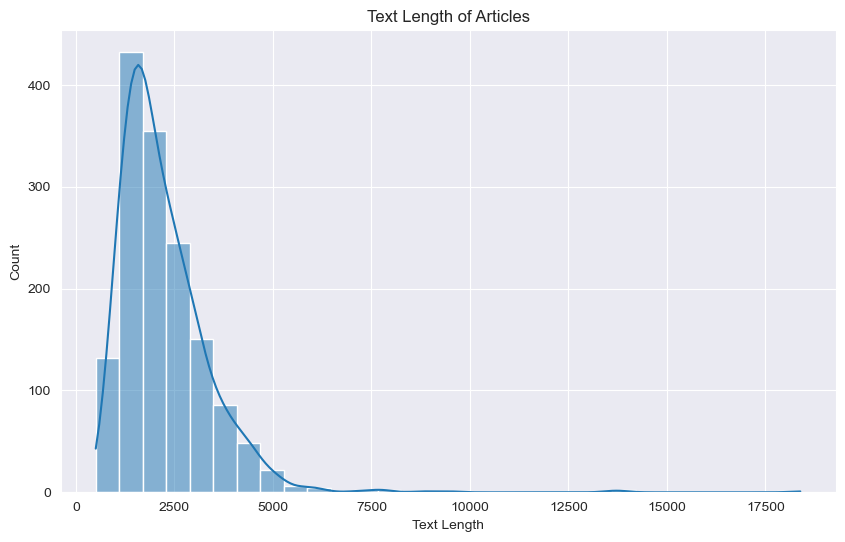

In [6]:
df_train["Text Length"] = df_train["Text"].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x="Text Length", bins=30, kde=True)
plt.title("Text Length of Articles")
plt.show()

In [7]:
# if nltk package is not installed, run the following commands
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")

def clean_text(text):
    # remove punctuation and numbers
    text = re.sub("[^a-zA-Z]", " ", text)
    # convert text to lowercase
    text = text.lower()
    # remove stop words
    stop_words = set(stopwords.words("english"))
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    # lemmatize the words
    cleaned_text = " ".join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    return cleaned_text

df_train["Cleaned Text"] = df_train["Text"].apply(clean_text)

In [8]:
# initialize the TF-IDF vectorizer, limiting the number of features to 5000
vectorizer = TfidfVectorizer(max_features=5000)  

# fit and transform the cleaned texts
X_train_tfidf = vectorizer.fit_transform(df_train["Cleaned Text"])
feature_names = vectorizer.get_feature_names_out()
# checking the shape of the TF-IDF matrix
X_train_tfidf.shape

(1490, 5000)

             bi_gram  count
6          last year    295
3            said mr    257
14          told bbc    235
34          mr blair    231
43          year old    225
33    prime minister    222
55          mr brown    171
17      mobile phone    145
73  general election    132
48        said would    130


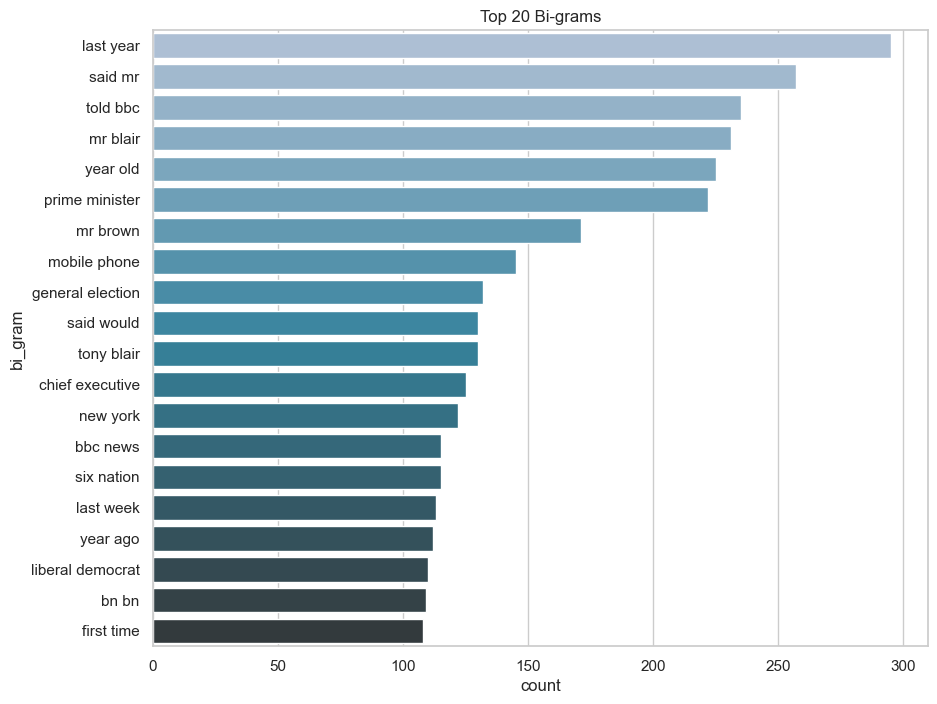

In [10]:
# vectorizing the cleaned texts
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=100)
X2 = vectorizer.fit_transform(df_train["Cleaned Text"])
sums = X2.sum(axis=0)

# connecting the sum counts with their respective bi-grams
data = [(word, sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
bi_gram_df = pd.DataFrame(data, columns=["bi_gram", "count"]).sort_values(by="count", ascending=False)
print(bi_gram_df.head(10))

plt.figure(figsize=(10, 8))
sns.barplot(x="count", y="bi_gram", data=bi_gram_df.head(20))
plt.title("Top 20 Bi-grams")
plt.show()

In [11]:
# for LDA, we use CountVectorizer to get token counts for each document
vectorizer_lda = CountVectorizer(max_features=5000)
X_lda = vectorizer_lda.fit_transform(df_train["Cleaned Text"])
# initialize LDA with parameters
lda_model = LatentDirichletAllocation(n_components=5, 
                                      learning_method="online",
                                      random_state=0,
                                      n_jobs=-1)
lda_topics = lda_model.fit_transform(X_lda)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# top 10 words in each topic
display_topics(lda_model, vectorizer_lda.get_feature_names_out(), 10)

Topic 0:
said game club mail virus site one would search player
Topic 1:
film year said best first one game award time also
Topic 2:
said mr would government election labour party people say minister
Topic 3:
said year bn company market firm sale also bank last
Topic 4:
said people mobile phone technology music service new also year


In [2]:
# vectorize the cleaned texts
vectorizer = CountVectorizer(max_features=5000)  
X_train_counts = vectorizer.fit_transform(df_train["Cleaned Text"])
lda = LatentDirichletAllocation(n_components=20, random_state=0)  
X_train_topics = lda.fit_transform(X_train_counts)

# encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train["Category"])

X_train, X_val, y_train, y_val = train_test_split(X_train_topics, y_train_encoded, test_size=0.2, random_state=0)

# use random forest classifier for comparison
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

# evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Validation Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

NameError: name 'df_train' is not defined

In [13]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(df_train["Cleaned Text"])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_train["Category"])

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=0)

svm_model = SVC(random_state=0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)

# evaluate the models
accuracy_svm = accuracy_score(y_val, y_pred_svm)
accuracy_rf = accuracy_score(y_val, y_pred_rf)

print(f"SVM Validation Accuracy: {accuracy_svm}")
print(f"Random Forest Validation Accuracy: {accuracy_rf}")

SVM Validation Accuracy: 0.9765100671140939
Random Forest Validation Accuracy: 0.9630872483221476


In [15]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_train["Cleaned Text"])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_train["Category"])

In [16]:
# function to integrate training models and returning their accuracies
def train_evaluate_models(X_data, y_data, fractions):
    results = []
    for frac in fractions:
        X_train_frac, X_val, y_train_frac, y_val = train_test_split(X_data, y_data, train_size=frac)
        svm_model = SVC()
        rf_model = RandomForestClassifier(n_estimators=100)
        svm_model.fit(X_train_frac, y_train_frac)
        rf_model.fit(X_train_frac, y_train_frac)
        y_pred_svm = svm_model.predict(X_val)
        y_pred_rf = rf_model.predict(X_val)
        
        accuracy_svm = accuracy_score(y_val, y_pred_svm)
        accuracy_rf = accuracy_score(y_val, y_pred_rf)
        
        results.append((frac, accuracy_svm, accuracy_rf))
    return results

fractions = [0.1, 0.2, 0.5]
results = train_evaluate_models(X_tfidf, y_encoded, fractions)
for frac, accuracy_svm, accuracy_rf in results:
    print(f"Fraction: {frac*100}% - SVM Accuracy: {accuracy_svm:.4f}, Random Forest Accuracy: {accuracy_rf:.4f}")

Fraction: 10.0% - SVM Accuracy: 0.8374, Random Forest Accuracy: 0.8762
Fraction: 20.0% - SVM Accuracy: 0.9471, Random Forest Accuracy: 0.9304
Fraction: 50.0% - SVM Accuracy: 0.9664, Random Forest Accuracy: 0.9477
